# Natpinai Phonngam 6030808421

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data =pd.read_csv("/Users/natpi/Desktop/geo data/accident_sample_bkk-main/accident_sample_bkk-main/event2019_BKK.csv" )

In [4]:
data

,title,latitude,longitude
0,อุบัติเหตุ ถนนรัชดาภิเษก ขาเข้า,13.756988,100.565255
1,อุบัติเหตุ ถนนทางรถไฟเก่าสายปากน้ำ,13.717649,100.565232
2,อุบัติเหตุ ถนนเจริญกรุง ขาเข้า,13.728361,100.515878
3,อุบัติเหตุ กรุงเทพมหานคร,13.753568,100.580294
4,อุบัติเหตุ แยกคลองเตย,13.720805,100.557668
...,...,...,...
3061,อุบัติเหตุ ถนนเพชรบุรี,13.749695,100.548232
3062,อุบัติเหตุ ห้วยขวาง กรุงเทพมหานคร,13.753643,100.580295
3063,อุบัติเหตุ ห้วยขวาง กรุงเทพมหานคร,13.753630,100.580293
3064,อุบัติเหตุ เจริญรัถ 8 (ซอยอยู่ดี),13.704420,100.516291


In [5]:
import folium as fo
longitude =  100.5538272857666
latitude = 13.734465925243732
station_map = fo.Map(
                location = [latitude, longitude], 
                zoom_start = 14)
latitudes = list(data.latitude)
longitudes = list(data.longitude)
labels = list(data.title)

for lat, lng, label in zip(latitudes, longitudes, labels):
    fo.Circle(
      location = [lat, lng],
      radius = 1,
      color = 'red' 
     ).add_to(station_map)
station_map

In [6]:
data.dtypes

title         object
latitude     float64
longitude    float64
dtype: object

ทำการHierarchical Clustering

In [7]:
from sklearn.cluster import AgglomerativeClustering as Agg

In [8]:
point=np.array(data[['latitude','longitude']].values.tolist())

In [9]:
point

array([[ 13.75698822, 100.56525484],
       [ 13.71764933, 100.56523204],
       [ 13.72836112, 100.51587805],
       ...,
       [ 13.7536295 , 100.5802926 ],
       [ 13.70441981, 100.51629111],
       [ 13.74915145, 100.51672965]])

In [53]:
model = Agg(distance_threshold=0.5, n_clusters=None).fit(point)

In [54]:
model = Agg(n_clusters=500).fit(point)

In [55]:
agg_label=model.labels_

In [56]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

ทำการนำข้อมูลที่วิเคราะห์ได้มาพล็อต

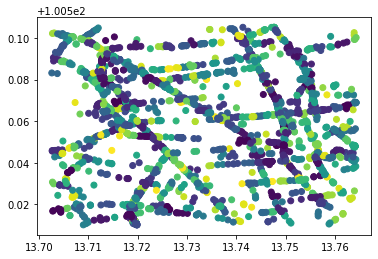

In [57]:
plt.scatter(data['latitude'], data['longitude'], c=agg_label)
plt.show()

In [58]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [59]:
silhouette_score(point, agg_label)

0.6143635379862475

In [65]:
import folium as fo
longitude =  100.5538272857666
latitude = 13.734465925243732
station_map = fo.Map(
                location = [latitude, longitude], 
                zoom_start = 14)
station_map